# Writting polytropic models

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
%matplotlib inline

### Constants values

In [4]:
Msun = 1.989e33 #sun mass [g]
Rsun = 6.96e10 #sun radius [cm]
n = 3 #polytropic index
Rho = 1.41 #sun mean density [g/cm^3]
X = 0.7 #hydrogen percentual
Y = 0.3 #helium percentual 
Z = 0.0 #metals percentual
Mi = 1.0/(2.0*X + 0.75*Y + 0.5*Z) #
R = 8.315e7 # [erg/K/g]
T_EoS = 1.5e7 #
G = 6.67259e-8 #gravitational constant [cm3/g/s^2] 
step = 1e-6 #arbitrary step

### Initial conditionals

In [5]:
w0 = 1 #w(r=0) = 0
dwdz0 = 0 #dw/dz(r=0) = 0
z0 = 1e-4 #2/z --> infinite

#### Creating empty lists for each variable
Z = [z0,0]
W = [w0,0]
dW = [dwdz0,0]

## write the equation here

In [6]:
i=0
while W[i] >= 0:
    dW[i+1] = - step*((2/Z[i])*(dW[i]) + (W[i]**n)) + dW[i]
    W[i+1] = W[i] + step*dW[i]    
    Z[i+1] = Z[i] + step    
    dW.append(dW[i+1])
    W.append(W[i+1])
    Z.append(Z[i+1])
    i += 1

### Calculating the estimated radius of the Sun

Text(0,0.5,'$\\omega(z)$')

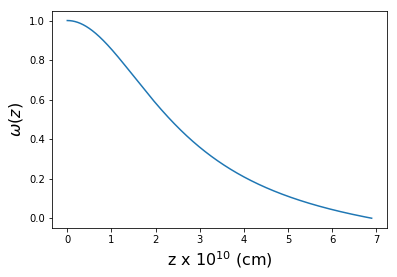

In [7]:
#Gráfico de w(z) versus z

plt.plot(Z,W)
plt.xlabel(r'z x $10^{10}$ (cm)',fontsize=16)
plt.ylabel(r'$\omega(z)$',fontsize=16)

In [8]:
z3 = Z[-1] * 10**10
z3

68968470006.10123

### Calculating the estimate central density of the Sun

In [9]:
dw_dz_imax = dW[-1]*10**10
print(dw_dz_imax)
rho_c = Rho / (-(3/(z3)*(dw_dz_imax)))
print(rho_c)

-424297514.60865957
76.39729149194976


### Calculating the estimate central pressure of the Sun

In [10]:
A = z3/Rsun
alpha = 1/A
print(A)

0.9909262931911096


In [11]:
theta_n = (-(z3**2)*dw_dz_imax)
Nn = (((4*math.pi)**(1/n))/(n+1))*(theta_n**((1-n)/n))*(z3**((n-3)/n))
K = Nn * G * (Msun**((n-1)/n)) * (Rsun**((3-n)/n))
#K = np.pi*G*(rho_c**(2/3))/(A**2)
print(K)

3.840724403238854e-06


In [12]:
K = 6.135e14

In [13]:
#Using the polytropic equation
gamma = 1 + 1/n
P_c = K*((rho_c)**(gamma))
#P = [K*d**(1+1/3) for d in density]

print('Pressão central do Sol = '+str(P_c)+' g/cm/s2')

Pressão central do Sol = 1.9887728515347712e+17 g/cm/s2


### Calculating the estimate central temperature of the Sun

In [14]:
#Using the ideal gas equation
Tc = Mi*P_c/(R*rho_c)
#T = [Mi*p/(R*d) for p,d in zip(P,density)]

print('Temperatura central do Sol= '+str(Tc)+' K')

Temperatura central do Sol= 19266002.048956476 K


##### Plots

In [15]:
r = [z/A for z in Z]
rho_r = [rho_c*(w**n) for w in W]
P_r = [P_c*(w**n+1) for w in W]
T_r = [(P_c/rho_c)*(Mi/R)*w for w in W]

Text(0,0.5,'$\\rho\\ [gcm^{-3}]$')

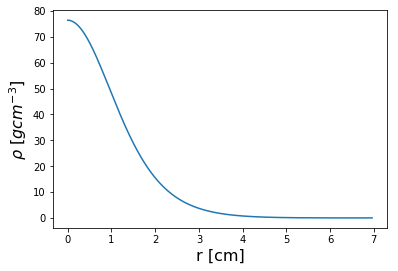

In [16]:
plt.plot(r[1:],rho_r[1:])
plt.xlabel('r [cm]',fontsize=16)
plt.ylabel(r'$\rho\ [gcm^{-3}]$',fontsize=16)

Text(0,0.5,'T [K]')

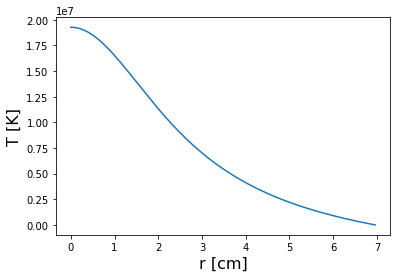

In [17]:
plt.plot(r[1:],T_r[1:])
plt.xlabel('r [cm]',fontsize=16)
plt.ylabel('T [K]',fontsize=16)

Text(0,0.5,'P [?]')

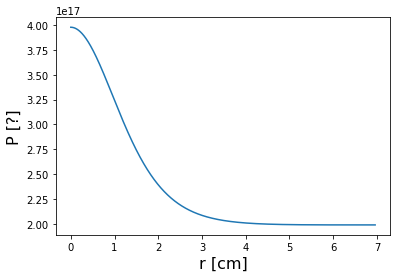

In [18]:
plt.plot(r[1:],P_r[1:])
plt.xlabel('r [cm]',fontsize=16)
plt.ylabel('P [?]',fontsize=16)